In [7]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
glass=pd.read_csv("https://raw.githubusercontent.com//nevased//Data-Set-for-Assignment//main//glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [10]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

## Visualizations

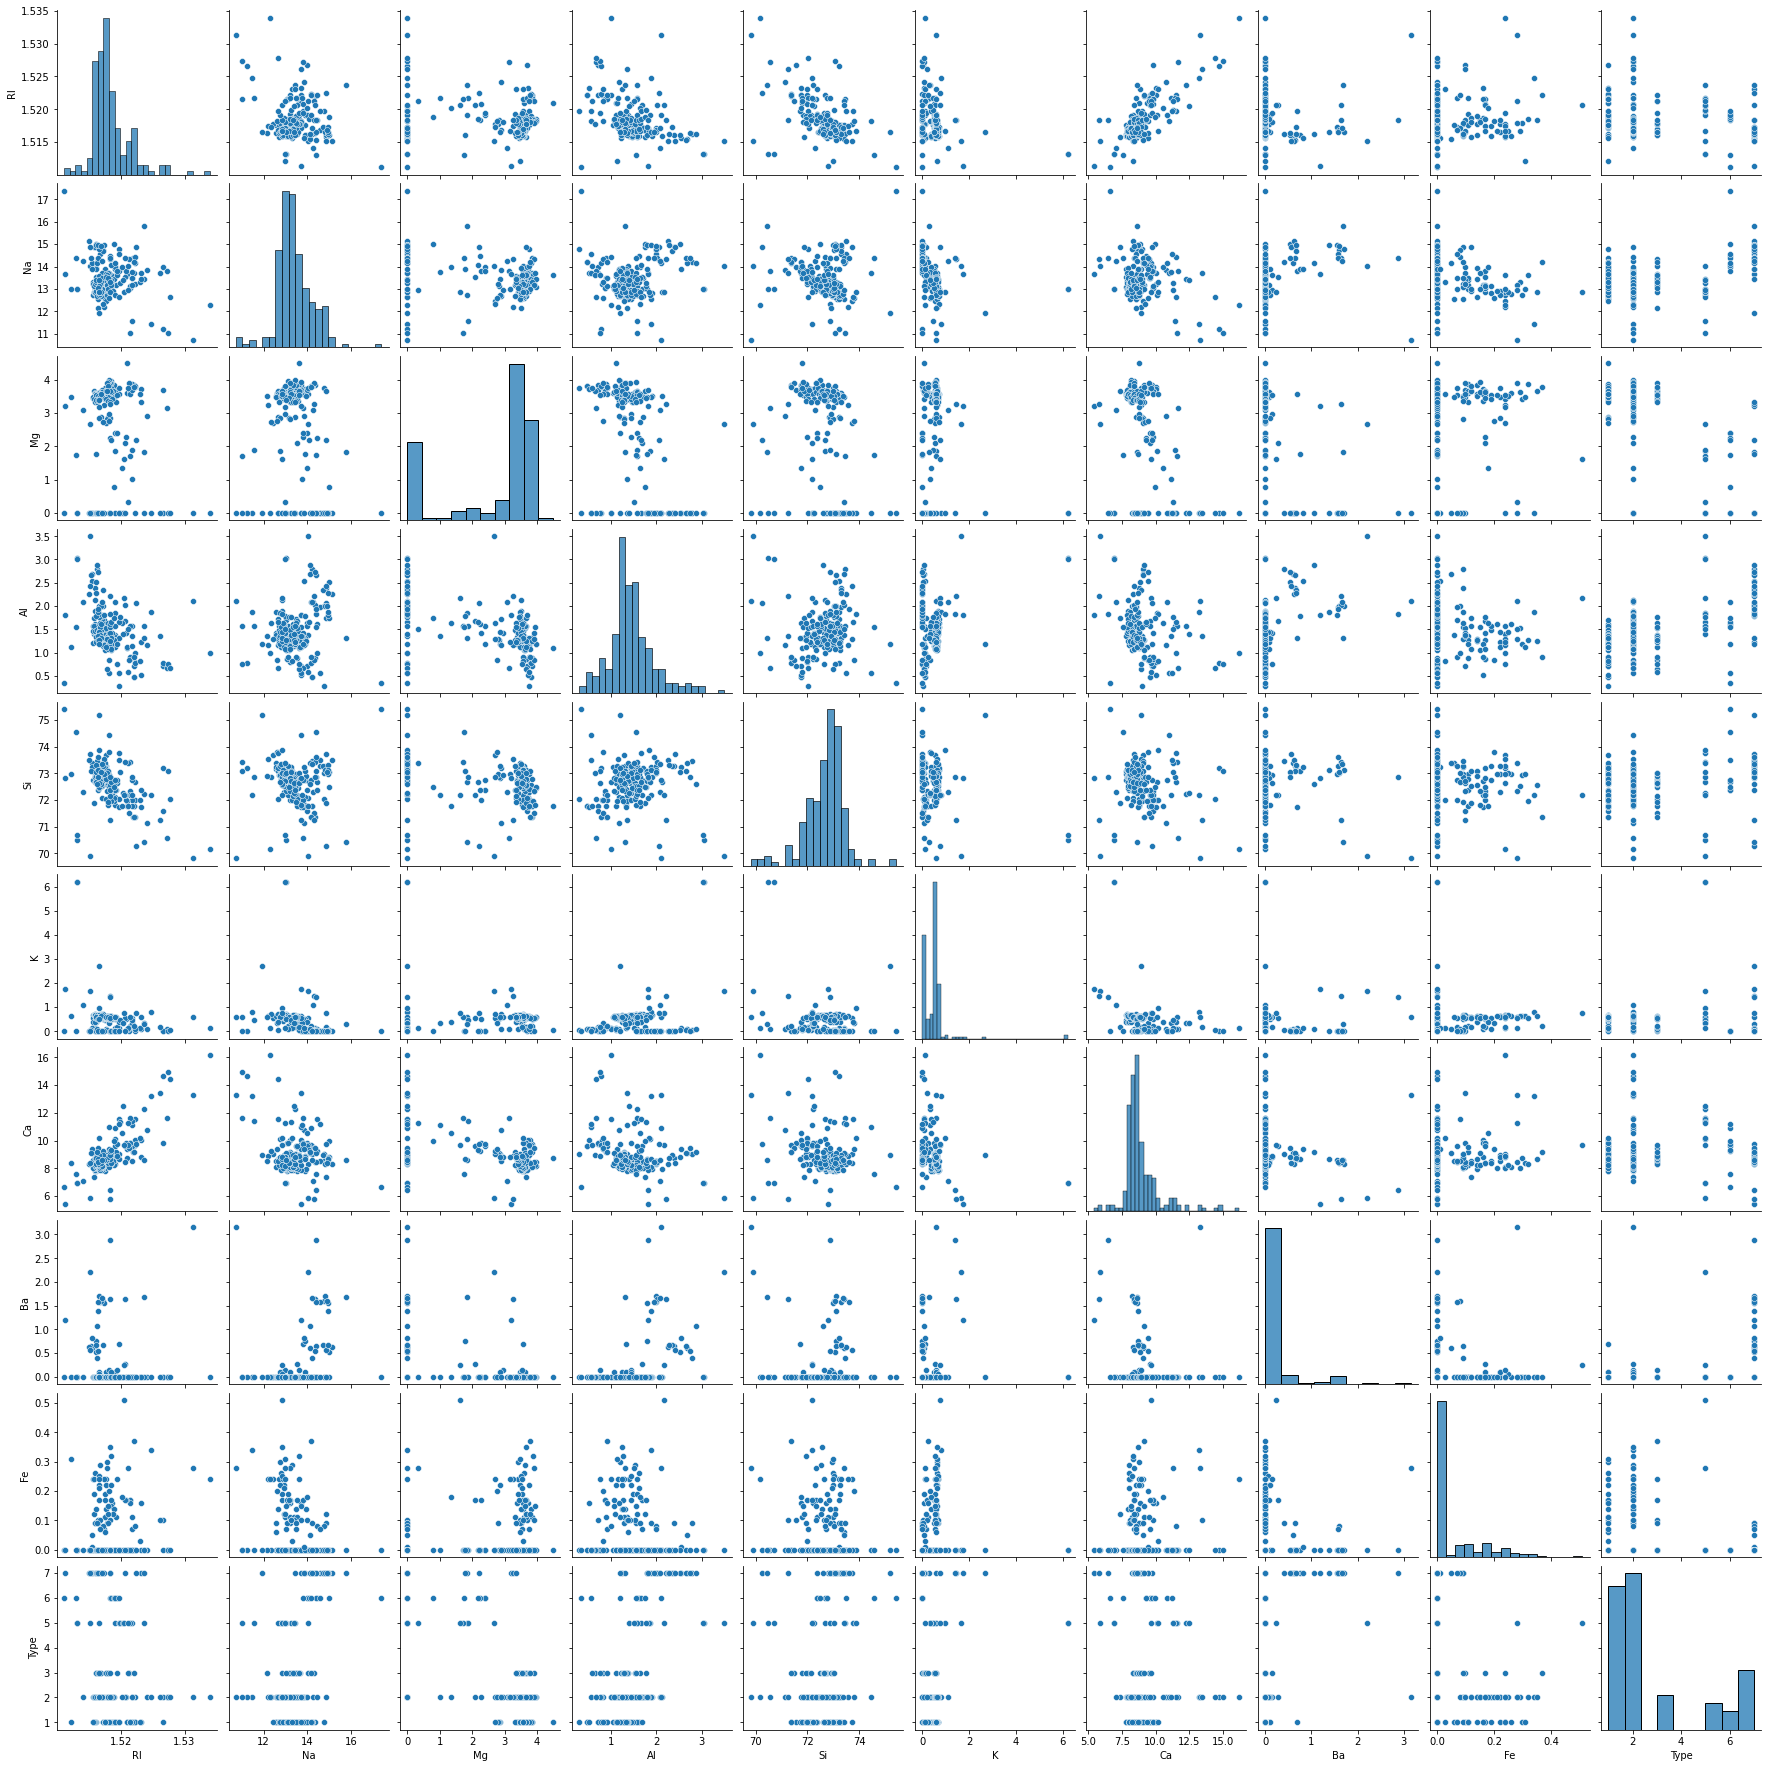

In [14]:
sns.pairplot(glass)

<AxesSubplot:xlabel='Na', ylabel='Mg'>

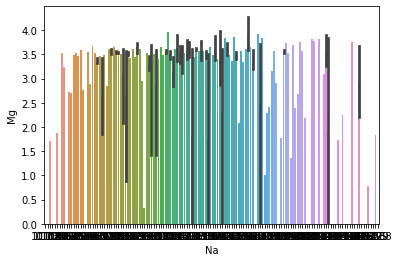

In [15]:
sns.barplot(glass['Na'],glass['Mg'])

<AxesSubplot:xlabel='Na', ylabel='Mg'>

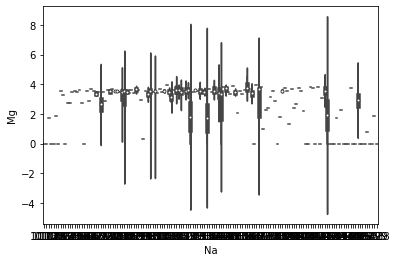

In [16]:
sns.violinplot(glass['Na'],glass['Mg'])

<function matplotlib.pyplot.show(close=None, block=None)>

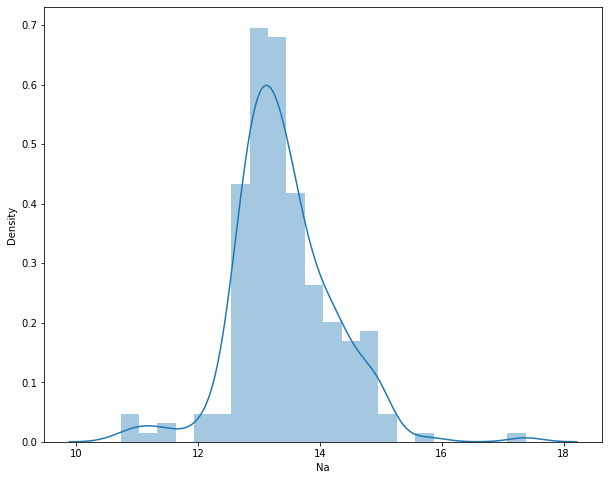

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(glass['Na'])
plt.show

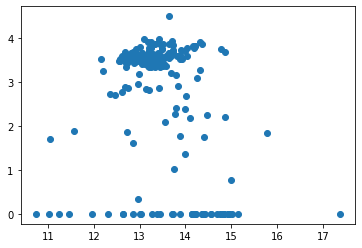

In [18]:
plt.scatter(glass['Na'],glass['Mg'])

In [19]:
X = glass.iloc[:,:-1]
Y = glass.iloc[:, -1]
# -1 means last column

In [20]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [21]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [22]:
model = KNeighborsClassifier(n_neighbors = 10)

In [23]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=10)

In [24]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv = kfold)

In [25]:
results

array([0.5       , 0.81818182, 0.63636364, 0.81818182, 0.28571429,
       0.52380952, 0.42857143, 0.        , 0.14285714, 0.04761905])

In [26]:
results.mean()

0.42012987012987013

In [27]:
model.predict([[1.52,13.254,0.0,1.94,73.42,0.55,8.753,1.06,0.0]])

array([7], dtype=int64)

In [28]:
model.predict([[1.78,14.554,0.0,1.7,79.42,0.85,7.753,1.58,0.0]])

array([7], dtype=int64)

### Grid Search For Algorithm Tuning

In [29]:
n_neighbors = list(range(1,51))
parameters = {'n_neighbors' : n_neighbors}

In [30]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [31]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


### Visualizing the CV results

In [32]:
k_range = range(1, 51)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())

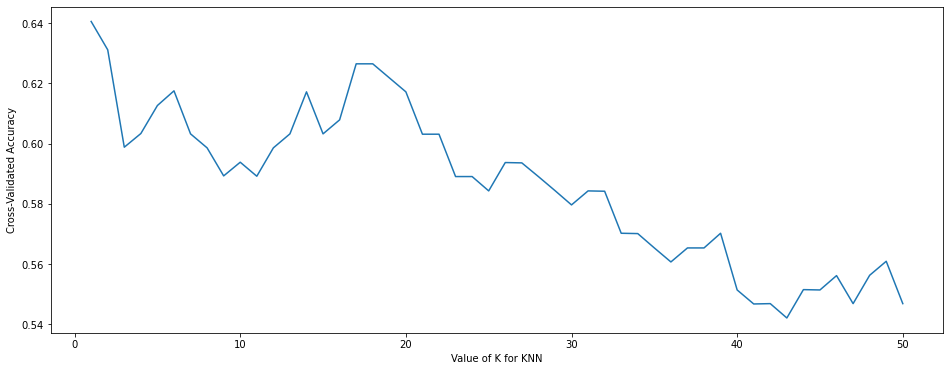

In [33]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [34]:
k_scores

[0.640531561461794,
 0.6311184939091916,
 0.598781838316722,
 0.6033222591362126,
 0.612624584717608,
 0.6174972314507199,
 0.6032115171650055,
 0.5985603543743079,
 0.5892580287929124,
 0.5937984496124031,
 0.5891472868217054,
 0.5985603543743079,
 0.6032115171650055,
 0.6171650055370985,
 0.6032115171650055,
 0.6078626799557032,
 0.626467331118494,
 0.626467331118494,
 0.6218161683277963,
 0.6171650055370985,
 0.6031007751937983,
 0.6031007751937983,
 0.5890365448504984,
 0.5890365448504984,
 0.5842746400885936,
 0.5936877076411959,
 0.5935769656699889,
 0.5890365448504983,
 0.5843853820598006,
 0.5796234772978959,
 0.5842746400885935,
 0.5841638981173864,
 0.5702104097452934,
 0.5700996677740863,
 0.5653377630121815,
 0.5606866002214839,
 0.5653377630121815,
 0.5653377630121816,
 0.5702104097452934,
 0.5513842746400887,
 0.546733111849391,
 0.546843853820598,
 0.5420819490586932,
 0.5514950166112957,
 0.5513842746400887,
 0.5561461794019934,
 0.546843853820598,
 0.5562569213732005,


In [35]:
df_accuracy = pd.DataFrame({'Value of k' : range(1,51),
                            'Accuracy' : k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.640532
1,2,0.631118
2,3,0.598782
3,4,0.603322
4,5,0.612625
5,6,0.617497
6,7,0.603212
7,8,0.598560
8,9,0.589258
9,10,0.593798


In [36]:
df_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
0,1,0.640532
1,2,0.631118
17,18,0.626467
16,17,0.626467
18,19,0.621816
5,6,0.617497
13,14,0.617165
19,20,0.617165
4,5,0.612625
15,16,0.607863


### zoo dataset

In [39]:
zoo = pd.read_csv("https://raw.githubusercontent.com//nevased//Data-Set-for-Assignment//main//Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [40]:
zoo.shape

(101, 18)

In [41]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [42]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [43]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [44]:
zoo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [45]:
zu=zoo['animal name'].astype('category')
zu.unique

<bound method Series.unique of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: category
Categories (100, object): ['aardvark', 'antelope', 'bass', 'bear', ..., 'wasp', 'wolf', 'worm', 'wren']>

### Visualization

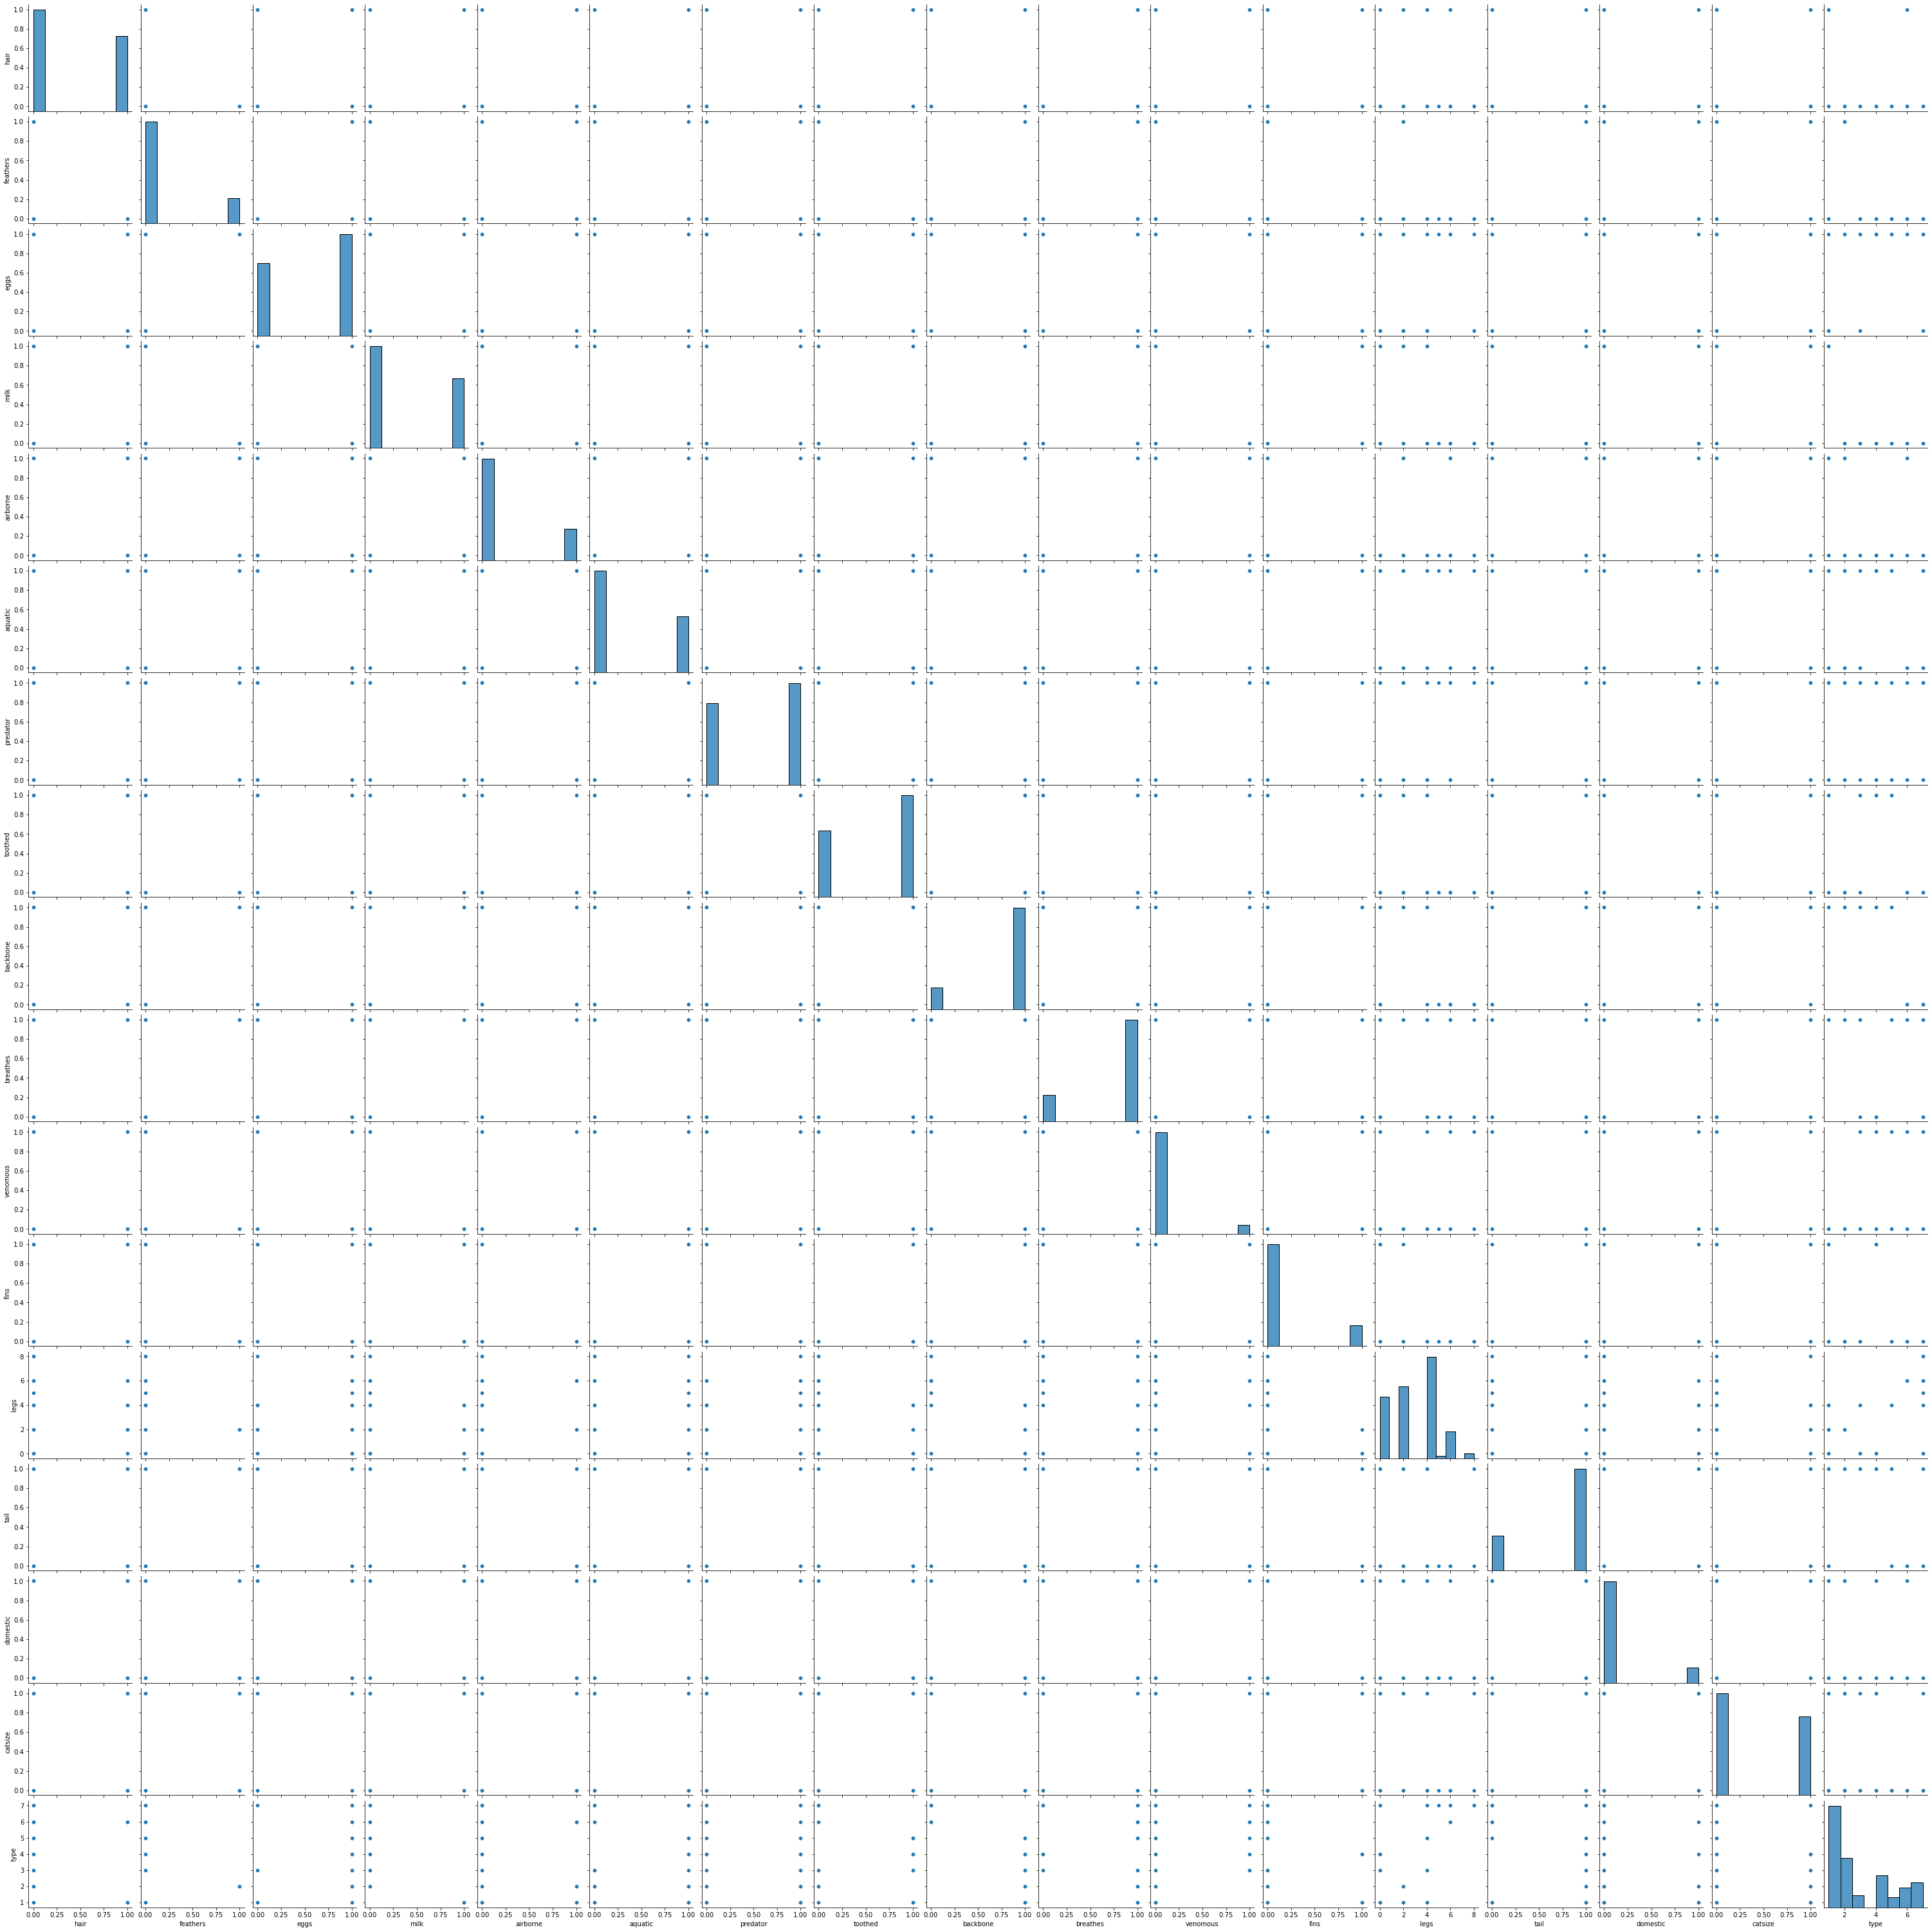

In [46]:
sns.pairplot(zoo)

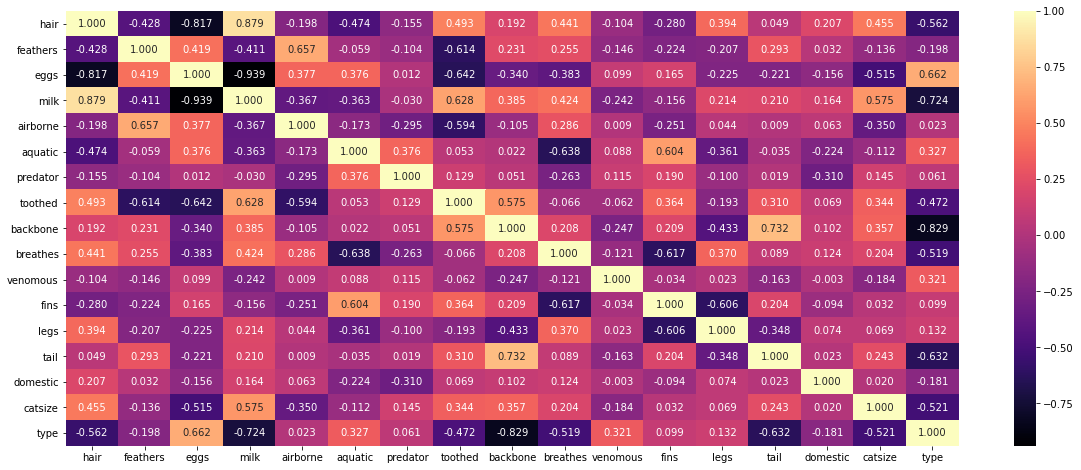

In [47]:
plt.figure(figsize = (20, 8));
sns.heatmap(zoo.corr(),cmap='magma', annot=True, fmt='.3f')
plt.show()

<AxesSubplot:xlabel='legs', ylabel='catsize'>

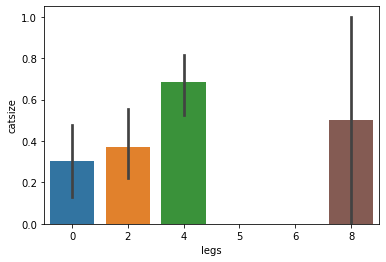

In [48]:
sns.barplot(zoo['legs'],zoo['catsize'])

### KNN Model Building

In [49]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#zoo['animal name']= label_encoder.fit_transform(zoo['animal name']) 

In [50]:
X = zoo.iloc[:, 1:17]
Y = zoo.iloc[:, -1]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [51]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [52]:
model2 = KNeighborsClassifier(n_neighbors = 17)

In [53]:
model2.fit(X,Y)

KNeighborsClassifier(n_neighbors=17)

In [54]:
kfold2 = KFold(n_splits=12)
results2 = cross_val_score(model2, X, Y, cv = kfold2)

In [55]:
results2

array([1.        , 0.66666667, 0.66666667, 1.        , 0.66666667,
       0.75      , 0.875     , 0.75      , 0.625     , 0.625     ,
       0.5       , 0.875     ])

In [56]:
results2.mean()

0.75

#### Grid Search for Algorithm Tuning

In [57]:
n_neighbors2 = list(range(1,40))
parameters2 = {'n_neighbors' : n_neighbors2}

In [58]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator = model2, param_grid = parameters2)
grid2.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [59]:
print(grid2.best_score_)
print(grid2.best_params_)

0.97
{'n_neighbors': 1}


### Visualizing the CV results

In [60]:
k_range = range(1,35)
k_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

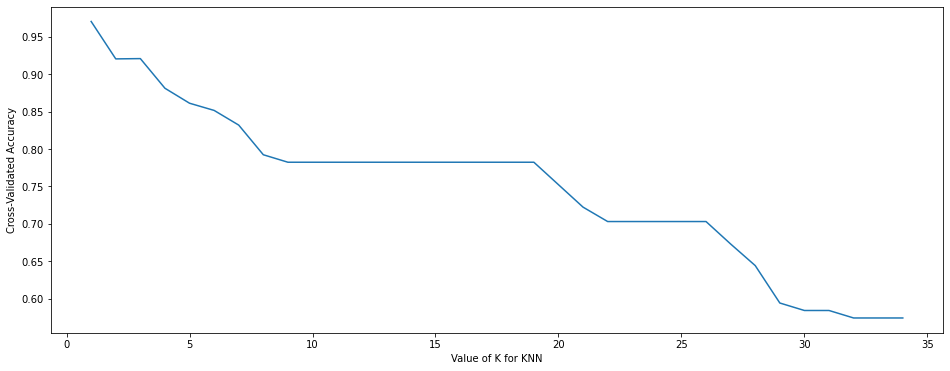

In [61]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [62]:
k_scores

[0.9703846153846154,
 0.9203846153846154,
 0.9207692307692308,
 0.8811538461538461,
 0.861153846153846,
 0.8515384615384615,
 0.831923076923077,
 0.7923076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7523076923076923,
 0.7223076923076924,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.6730769230769231,
 0.6442307692307693,
 0.5942307692307692,
 0.5842307692307692,
 0.5842307692307692,
 0.5742307692307692,
 0.5742307692307692,
 0.5742307692307692]

In [63]:
zoo_accuracy = pd.DataFrame({'Value of k' : range(1,35),
                            'Accuracy' : k_scores})
zoo_accuracy

,Value of k,Accuracy
0,1,0.970385
1,2,0.920385
2,3,0.920769
3,4,0.881154
4,5,0.861154
5,6,0.851538
6,7,0.831923
7,8,0.792308
8,9,0.782308
9,10,0.782308


In [64]:
zoo_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
0,1,0.970385
2,3,0.920769
1,2,0.920385
3,4,0.881154
4,5,0.861154
5,6,0.851538
6,7,0.831923
7,8,0.792308
13,14,0.782308
18,19,0.782308
